In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score

total_length = 30
train_length = 15
test_length = 3

lr = LinearRegression()
sensor_stuck = []
sensor_stuck_train = []
sensor_stuck_test = []

t = np.zeros(total_length)
t_train = []
t_test = []
dt = 2.0
t[0] = 0

for i in range(1,total_length ):
    if i < train_length / 3 + 1:
        a = t[i - 1] * 2 + 3
        sensor_stuck.append(a)
        sensor_stuck_train.append(a)
        t[i] = t[i-1] + dt
        t_train.append(t[i-1])
        
    elif i < train_length / 3 + test_length + 1:
        a = t[i - 1]  * 2 + 3
        sensor_stuck.append(a)
        sensor_stuck_test.append(a)
        t[i] = t[i-1] + dt
        t_test.append(t[i-1])
        
        
    elif i< train_length + test_length + 1:
        a = t[i - 1]  * 2 + 3
        sensor_stuck.append(a)
        sensor_stuck_train.append(sensor_stuck_test[0])
        sensor_stuck_test.pop(0)
        sensor_stuck_test.append(a)
        
        t[i] = t[i-1] + dt
        t_train.append(t_test[0])
        t_test.pop(0)
        t_test.append(t[i-1])
        
    elif i< train_length + test_length + train_length / 3 + 1: 
        a = t[i - 1]  * 2 + 3
        sensor_stuck.append(a)
        sensor_stuck_train.append(sensor_stuck_test[0])
        sensor_stuck_test.pop(0)
        sensor_stuck_test.append(a)
        
        t[i] = t[i-1] + dt
        t_train.append(t_test[0])
        t_test.pop(0)
        t_test.append(t[i-1])        
        
    else:
        a = t[i-1] * 2 + 3
        sensor_stuck.append(a)
        sensor_stuck_train.pop(0)
        sensor_stuck_train.append(sensor_stuck_test[0])
        sensor_stuck_test.pop(0)
        sensor_stuck_test.append(a)
        
        t[i] = t[i-1]  + dt
        t_train.pop(0)
        t_train.append(t_test[0])
        t_test.pop(0)
        t_test.append(t[i-1])

print(t_test)
print(sensor_stuck_test)
print(t_train)
print(sensor_stuck_train)

        
X = np.array(t_train).reshape(-1, 1)
y = np.array(sensor_stuck_train).reshape(-1, 1)

X_test = np.array(t_test).reshape(-1,1)

lr = LinearRegression()
lr.fit(X, y)
y_train_pred = lr.predict(X)
y_test_pred = lr.predict(X_test)
c = []
c.append(105)
s = np.array(c).reshape(-1,1)
a = lr.predict(s)

print(f"y = {lr.intercept_[0]:.2f} + {lr.coef_[0][0]:.2f}x")
print(y_test_pred)
print(a)

y_test = np.array(sensor_stuck_test).reshape(-1,1)

print(r2_score(y, y_train_pred),r2_score(y_test, y_test_pred))

[52.0, 54.0, 56.0]
[107.0, 111.0, 115.0]
[12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0]
[27.0, 31.0, 35.0, 39.0, 43.0, 47.0, 51.0, 55.0, 59.0, 63.0, 67.0, 71.0, 75.0, 79.0, 83.0, 87.0, 91.0, 95.0, 99.0, 103.0]
y = 3.00 + 2.00x
[[107.]
 [111.]
 [115.]]
[[213.]]
1.0 1.0


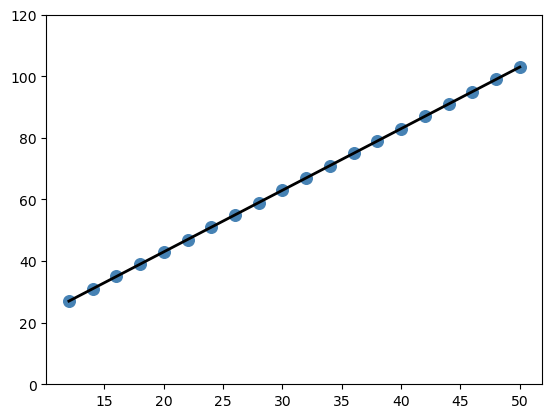

In [45]:
import matplotlib.pyplot as plt
plt.scatter(X,y, c='steelblue', s=70)
plt.plot(X, lr.predict(X), color='black',lw=2)
plt.ylim([0,120])
plt.show()

In [ ]:
num_rooms_std = sc_xtransform()